In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd Chart_School_Analysis/

[WinError 2] The system cannot find the file specified: 'Chart_School_Analysis/'
C:\Users\nvicente\Documents\Random\Jupyter Notebook\Chart_School_Analysis


In [3]:
df = pd.read_csv("StudentApplications.csv")

In [4]:
df = df.fillna(" ")

In [5]:
def join_names(first,middle,last):
    first = first.tolist()
    last = last.tolist()
    new_name = []
    
    try:
        middle = middle.tolist()
        for i in range(len(first)):
            if middle != " ":
                new_name.append(f"{first[i]} {middle[i]} {last[i]}")
            else:
                new_name.append(f"{first[i]}{last[i]}")
    except:
        for i in range(len(first)):
            new_name.append(f"{first[i]} {last[i]}")
        
    return new_name

In [6]:
def merge_address(street1,street2,zipcode,state,city):
    street1 = street1.tolist() 
    street2 = street2.tolist()
    zipcode = zipcode.tolist()
    state = state.tolist()
    city = city.tolist()
    address = []
    for i in range(len(street1)):
        address.append(f"{street1[i]} {street2[i]} {zipcode[i]} {state[i]} {city[i]}")
        
    return address

In [7]:
def birthday(birthday):
    birth_date = birthday.tolist()
    new_bday = []
    for i in birthday:
        year,month,day = i.split("-")
        new_bday.append(f"{month}/{day}/{year[2:]}")
    
    return new_bday

In [8]:
def phone_number(number):
    number = str(number)
    return f"({number[:3]}) {number[3:6]}-{number[6:]}"

In [311]:
def appplication_type(app_type):
    type_dic = {"WA": "Waitlisted","CA": "Canceled","DE": "Declined","RV": "Registration Verified","RS": \
                "Rescinded","WD": "Withdrawn","AC": "Accepted","RP": "Registration in Progress","OF": "Offered","SU": "Submitted",}
    app_type = type_dic.get(app_type)
    
    return app_type

In [10]:
def status_waitlisted(status, waitlist): 
    status_list = status.tolist()
    waitlist_list = waitlist.tolist()

    for i in range(len(status_list)):
        if status_list[i] == "Waitlisted":
            status_list[i] = f"{status_list[i]}-{waitlist_list[i]}"
            
    return status_list

In [11]:
def clean_timestamp(timestamp):
        return timestamp[:-6]

In [12]:
df["Student Name"] = join_names(df["first_name"],df["middle_name"],df["last_name"])
df["Parent Name"] = join_names(df["guardian_first_name"],"no name",df["guardian_last_name"])
df["Address"] = merge_address(df["street1"],df["street2"],df["zipcode"],df["state"],df["city"])
df["Birthday"] = birthday(df["birth_date"])
# Change M to Male and F to Female
gender_dic = {"M":"Male","F":"Female","nan":"Unknown"}
df["Gender"] = df["gender"].map(lambda x: gender_dic.get(x))
df["Contact Number"] = df["phone_number"].apply(phone_number)
app_dic = {"OE":"Open Enrollment","PE":"Post Enrollment"}
df["Application Type"] = df["application_type"].map(lambda x: app_dic.get(x))
df["Status"] = df["status"].apply(appplication_type)
df["Status"] = status_waitlisted(df["Status"],df["waitlist_number"]) 
df["Time Stamp"] = df["status_timestamp"].apply(clean_timestamp)
df["Updated"] = df["updated_at"].apply(clean_timestamp)

In [13]:
df = df.drop(columns = ["application_id","account_id","student_id","applicant_id","sis_id","sis_local_id","street1","street2","zipcode","state","city",\
                       "application_type","status","first_name","middle_name","last_name","birth_date","gender","phone_number","created_by","guardian_first_name","guardian_last_name"\
                       ,"waitlist_number","school_group","priorities","home_phone_number","status_timestamp","updated_at"])

In [14]:
df = df.rename(columns = {"grade_name":"Grade Applied To","current_grade_level":"Current Grade","preferred_language":"Preferred Language"\
                         ,"email":"Email","lives_with":"Lives With","school_name":"School Applied To","current_school_name":"Current School",\
                          "district_name":"Current School District","submission_date":"Date Submitted","offered_date":"Offered Date"\
                         ,"offer_accepted_date":"Offer Accepted Date"})

In [15]:
df.head()

,Email,Lives With,Date Submitted,Offered Date,Offer Accepted Date,Current Grade,Grade Applied To,School Applied To,Current School,Current School District,...,Student Name,Parent Name,Address,Birthday,Gender,Contact Number,Application Type,Status,Time Stamp,Updated
0,hildaj06@outlook.com,MO|FA,09/04/2018 05:55:07 PDT,,,8,9,USC Hybrid High School,,Los Angeles Unified School District,...,Kevin Garcia,Hilda Javier,2741 Van Buren Pl Apt 02 90007 CA Los Angeles,11/20/05,Male,(323) 928-8844,Open Enrollment,Waitlisted-682,2019-02-12 18:46:31,2019-12-03 13:41:48
1,malvagrant@yahoo.com,MO|FA,09/04/2018 06:01:24 PDT,,,8,9,USC Hybrid High School,,Los Angeles Unified School District,...,Jazmine Alesha Betson,Malva Palacio- Grant,622 W 77th St Apt 6 90044 CA Los Angeles,07/24/04,Female,(323) 527-6738,Open Enrollment,Waitlisted-307,2019-02-12 18:46:09,2019-12-03 13:41:09
2,3234453696@schoolmint.net,MO,09/04/2018 07:59:07 PDT,,,10,11,USC Hybrid High School,,Los Angeles Unified School District,...,Teryn O Johnson,Terrea Moore,4126 2nd Avenue 90008 CA Los Angeles,04/21/03,Male,(323) 445-3696,Open Enrollment,Waitlisted-22,2019-02-12 18:29:20,2019-10-28 15:54:12
3,dalamonte4@gmail.com,FA,09/04/2018 08:53:43 PDT,,,8,9,USC Hybrid High School,,Los Angeles Unified School District,...,Uryiah Elizabeth Brown,Davion Brown,735 1/2 W 42nd St 90037 CA Los Angeles,03/18/05,Female,(323) 353-4559,Open Enrollment,Waitlisted-665,2019-02-12 18:46:30,2019-12-03 13:41:46
4,teresanonoal@gmail.com,MO,09/04/2018 09:14:57 PDT,,,9,9,USC Hybrid High School,,Los Angeles Unified School District,...,Medeline Garcia,Theresa Nonoal,212 E 30th St 90011 CA Los Angeles,07/15/04,Female,(232) 620-8391,Open Enrollment,Waitlisted-42,2019-02-12 18:45:53,2019-12-03 13:40:40


In [16]:
df = df.to_csv("Clean_Ednovate.csv")
df = pd.read_csv("Clean_Ednovate.csv")
df = df.drop(columns = ["Unnamed: 0"])

In [17]:
count_by_school = df.groupby(["School Applied To"]).count()[["Student Name"]].reset_index()

In [18]:
x = count_by_school["School Applied To"]
y = count_by_school["Student Name"]

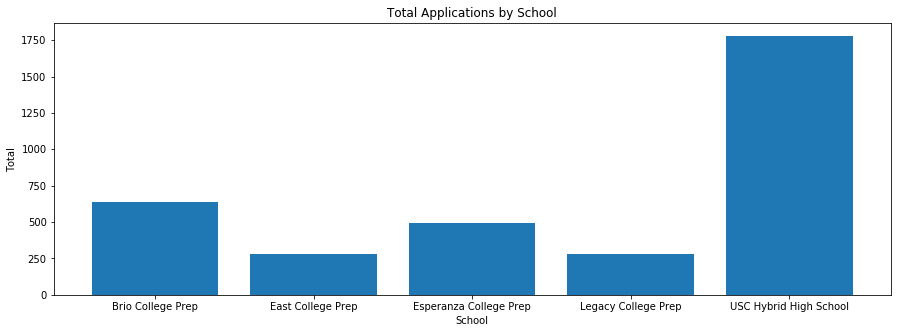

In [19]:
plt.figure(figsize = (15,5))
plt.bar(x,y)
plt.xlabel("School")
plt.ylabel("Total")
plt.title("Total Applications by School")

plt.show()

# Clean Data To Create Gender Graphs

In [20]:
df_test = df.set_index("School Applied To")[["Gender"]].reset_index()

In [21]:
df_test = df_test.sort_values(by = "Gender")

In [22]:
df_test.fillna("Unknown",inplace = True)

In [23]:
df_test.groupby("Gender").count()[["School Applied To"]]

,School Applied To
Gender,
Female,1740
Male,1385
Unknown,346


In [24]:
df_gender_split = pd.concat([df_test,pd.get_dummies(df_test["Gender"],prefix = "Gender")],axis = 1)

In [25]:
df_gender_split.drop(columns = ["Gender"],inplace = True)

In [26]:
df_gender_split.head()

,School Applied To,Gender_Female,Gender_Male,Gender_Unknown
3470,USC Hybrid High School,1,0,0
1428,Esperanza College Prep,1,0,0
2742,USC Hybrid High School,1,0,0
1425,USC Hybrid High School,1,0,0
2743,USC Hybrid High School,1,0,0


In [27]:
df_hybrid = df_gender_split.loc[df_gender_split["School Applied To"] == "USC Hybrid High School",:]
df_legacy = df_gender_split.loc[df_gender_split["School Applied To"] == "Legacy College Prep",:]
df_brio = df_gender_split.loc[df_gender_split["School Applied To"] == "Brio College Prep",:]
df_east = df_gender_split.loc[df_gender_split["School Applied To"] == "East College Prep",:]
df_esperanza = df_gender_split.loc[df_gender_split["School Applied To"] == "Esperanza College Prep",:]

In [28]:
df_hybrid_grouped = df_hybrid.groupby(["Gender_Female","Gender_Male","Gender_Unknown"]).count()
y_hybrid = df_hybrid_grouped["School Applied To"].tolist()
x_hybrid = ["Unkown","Male","Female"]

In [29]:
df_legacy_grouped = df_legacy.groupby(["Gender_Female","Gender_Male","Gender_Unknown"]).count()
y_legacy = df_legacy_grouped["School Applied To"].tolist()
x_legacy = ["Unkown","Male","Female"]

In [30]:
df_esperanza_grouped = df_esperanza.groupby(["Gender_Female","Gender_Male","Gender_Unknown"]).count()
y_esperanza = df_esperanza_grouped["School Applied To"].tolist()
x_esperanza = ["Unkown","Male","Female"]

In [31]:
df_brio_grouped = df_brio.groupby(["Gender_Female","Gender_Male","Gender_Unknown"]).count()
y_brio = df_brio_grouped["School Applied To"].tolist()
x_brio = ["Unkown","Male","Female"]

In [32]:
df_east_grouped = df_east.groupby(["Gender_Female","Gender_Male","Gender_Unknown"]).count()
y_east = df_east_grouped["School Applied To"].tolist()
x_east = ["Unkown","Male","Female"]

# Create chart that shows gender breakdown by school

In [33]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [34]:
labels = df_gender_split["School Applied To"].drop_duplicates().to_list()

In [35]:
labels

['USC Hybrid High School',
 'Esperanza College Prep',
 'Brio College Prep',
 'Legacy College Prep',
 'East College Prep']

In [36]:
male_count = [y_hybrid[1], y_esperanza[1], y_brio[1], y_legacy[1], y_east[1]]
female_count = [y_hybrid[2], y_esperanza[2], y_brio[2], y_legacy[2], y_east[2]]
unknown_count = [y_hybrid[0], y_esperanza[0], y_brio[0], y_legacy[0], y_east[0]]

In [37]:
x = np.arange(len(labels))
width = 0.25

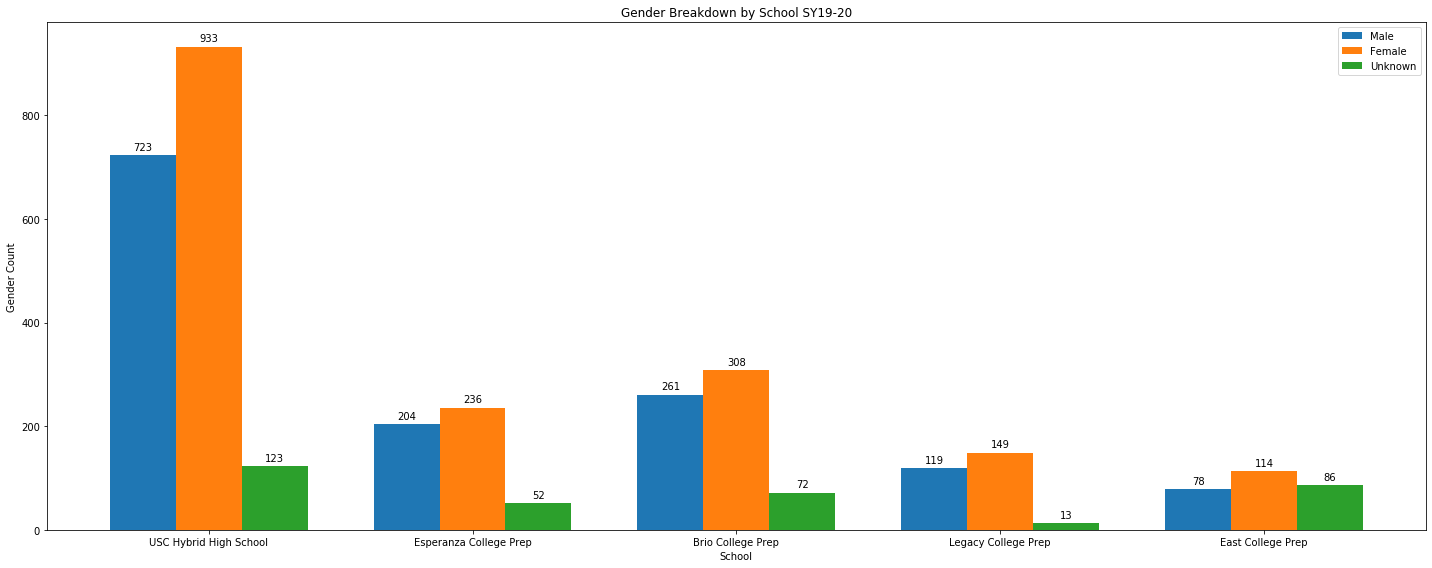

In [38]:
fig,ax = plt.subplots(figsize= (20,8))
rect1 = ax.bar(x - width, male_count,width, label = "Male")
rect2 = ax.bar(x, female_count,width, label = "Female")
rect3 = ax.bar(x + width, unknown_count,width, label = "Unknown")

ax.set_ylabel('Gender Count')
ax.set_xlabel("School")
ax.set_title('Gender Breakdown by School SY19-20')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

fig.tight_layout()

plt.show()

In [39]:
df.fillna("Unknown",inplace = True)

In [40]:
df_hybrid_only = df.loc[df["School Applied To"] == "USC Hybrid High School",:]
df_brio_only = df.loc[df["School Applied To"] == "Brio College Prep",:]
df_legacy_only = df.loc[df["School Applied To"] == "Legacy College Prep",:]
df_east_only = df.loc[df["School Applied To"] == "East College Prep",:]
df_esperanza_only = df.loc[df["School Applied To"] == "Esperanza College Prep",:]

# Open and Post Enrollment Charts By School

## Hybrid

In [41]:
#Group school by application type
hybrid_group = df_hybrid_only.groupby("Application Type").count()[["School Applied To"]].reset_index()
x_hybrid = hybrid_group["Application Type"].tolist()
y_hybrid = hybrid_group["School Applied To"].tolist()

# #Create bar chart
# x_pos = [i for i,_ in enumerate(x_hybrid)]
# plt.figure(figsize = (15,8))
# plt.bar(x_pos, y_hybrid, color = "tomato")
# plt.xlabel("Application Type")
# plt.ylabel("Total")
# plt.xticks(x_pos,x_hybrid)
# plt.title("USC Hybrid High School SY19-20 Application Type")

# # Add labels on top of bar chart
# for i, v in enumerate(y_hybrid):
#     plt.text(x_pos[i], v+2, str(v))

# plt.show()

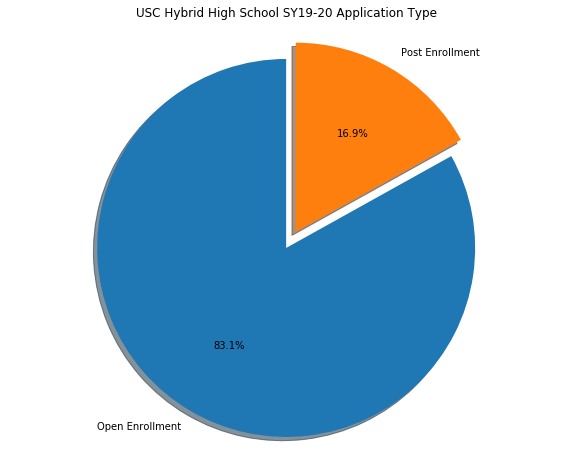

In [42]:
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(y_hybrid, explode=explode, labels=x_hybrid, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("USC Hybrid High School SY19-20 Application Type")
plt.show()

## East

In [43]:
#Group school by application type
east_group = df_east_only.groupby("Application Type").count()[["School Applied To"]].reset_index()
x_east = east_group["Application Type"].tolist()
y_east = east_group["School Applied To"].tolist()

#Create bar chart
# x_pos = [i for i,_ in enumerate(x_east)]
# plt.figure(figsize = (15,8))
# plt.bar(x_pos, y_east, color = "lightsteelblue")
# plt.xlabel("Application Type")
# plt.ylabel("Total")
# plt.xticks(x_pos,x_east)
# plt.title("East College Prep SY19-20 Application Type")

# # Add labels on top of bar chart
# for i, v in enumerate(y_east):
#     plt.text(x_pos[i], v+2, str(v))

# plt.show()

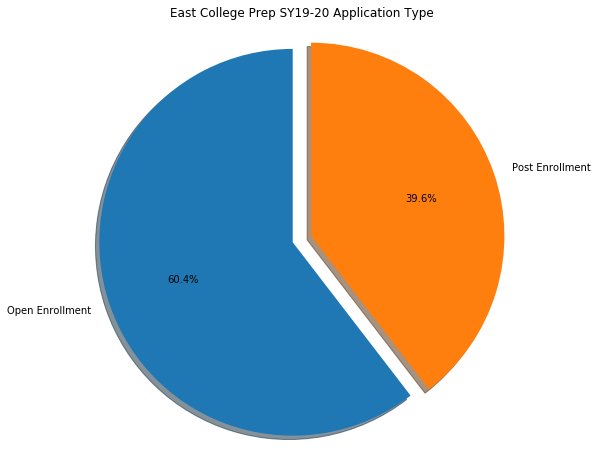

In [44]:
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(y_east, explode=explode, labels=x_east, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("East College Prep SY19-20 Application Type")
plt.show()

## Esperanza

In [45]:
#Group school by application type
esperanza_group = df_esperanza_only.groupby("Application Type").count()[["School Applied To"]].reset_index()
x_esperanza = esperanza_group["Application Type"].tolist()
y_esperanza = esperanza_group["School Applied To"].tolist()

#Create bar chart
# x_pos = [i for i,_ in enumerate(x_esperanza)]
# plt.figure(figsize = (15,8))
# plt.bar(x_pos, y_esperanza, color = "darkorange")
# plt.xlabel("Application Type")
# plt.ylabel("Total")
# plt.xticks(x_pos,x_esperanza)
# plt.title("Esperanza College Prep SY19-20 Application Type")

# # Add labels on top of bar chart
# for i, v in enumerate(y_esperanza):
#     plt.text(x_pos[i], v+2, str(v))

# plt.show()

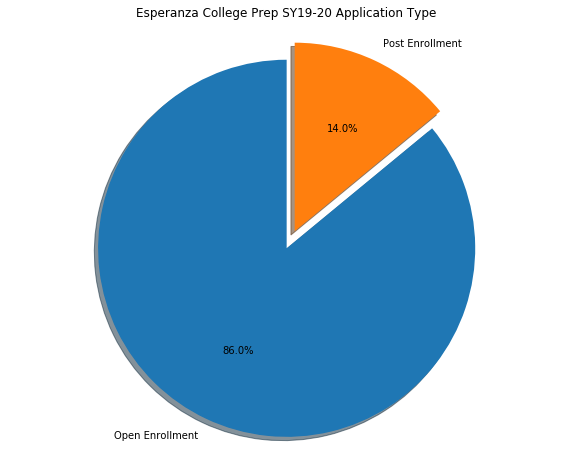

In [46]:
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(y_esperanza, explode=explode, labels=x_esperanza, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Esperanza College Prep SY19-20 Application Type")
plt.show()

## Brio

In [47]:
#Group school by application type
brio_group = df_brio_only.groupby("Application Type").count()[["School Applied To"]].reset_index()
x_brio = brio_group["Application Type"].tolist()
y_brio = brio_group["School Applied To"].tolist()

#Create bar chart
# x_pos = [i for i,_ in enumerate(x_brio)]
# plt.figure(figsize = (15,8))
# plt.bar(x_pos, y_brio, color = "royalblue")
# plt.xlabel("Application Type")
# plt.ylabel("Total")
# plt.xticks(x_pos,x_brio)
# plt.title("Brio College Prep SY19-20 Application Type")

# # Add labels on top of bar chart
# for i, v in enumerate(y_brio):
#     plt.text(x_pos[i], v+2, str(v))

# plt.show()

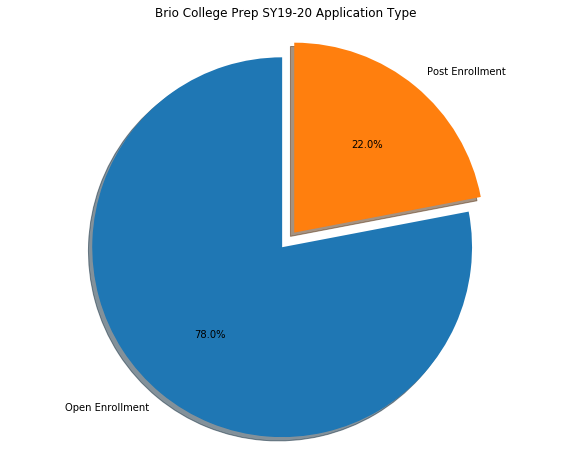

In [48]:
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(y_brio, explode=explode, labels=x_brio, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Brio College Prep SY19-20 Application Type")
plt.show()

## Legacy

In [49]:
#Group school by application type
legacy_group = df_legacy_only.groupby("Application Type").count()[["School Applied To"]].reset_index()
x_legacy = legacy_group["Application Type"].tolist()
y_legacy = legacy_group["School Applied To"].tolist()

#Create bar chart
# x_pos = [i for i,_ in enumerate(x_legacy)]
# plt.figure(figsize = (15,8))
# plt.bar(x_pos, y_legacy, color = "purple")
# plt.xlabel("Application Type")
# plt.ylabel("Total")
# plt.xticks(x_pos,x_legacy)
# plt.title("Legacy College Prep SY19-20 Application Type")

# # Add labels on top of bar chart
# for i, v in enumerate(y_legacy):
#     plt.text(x_pos[i], v+2, str(v))

# plt.show()

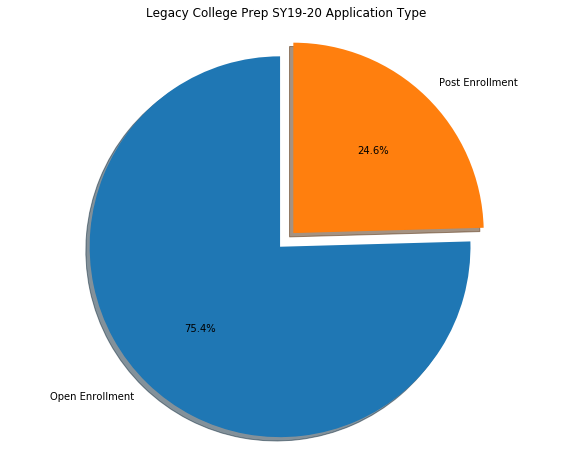

In [50]:
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(y_legacy, explode=explode, labels=x_legacy, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Legacy College Prep SY19-20 Application Type")
plt.show()

## All Schools

In [51]:
labels = df_gender_split["School Applied To"].drop_duplicates().to_list()
open_count = [y_hybrid[0], y_esperanza[0], y_brio[0], y_legacy[0], y_east[0]]
post_count = [y_hybrid[1], y_esperanza[1], y_brio[1], y_legacy[1], y_east[1]]
x = np.arange(len(labels))
width = 0.25

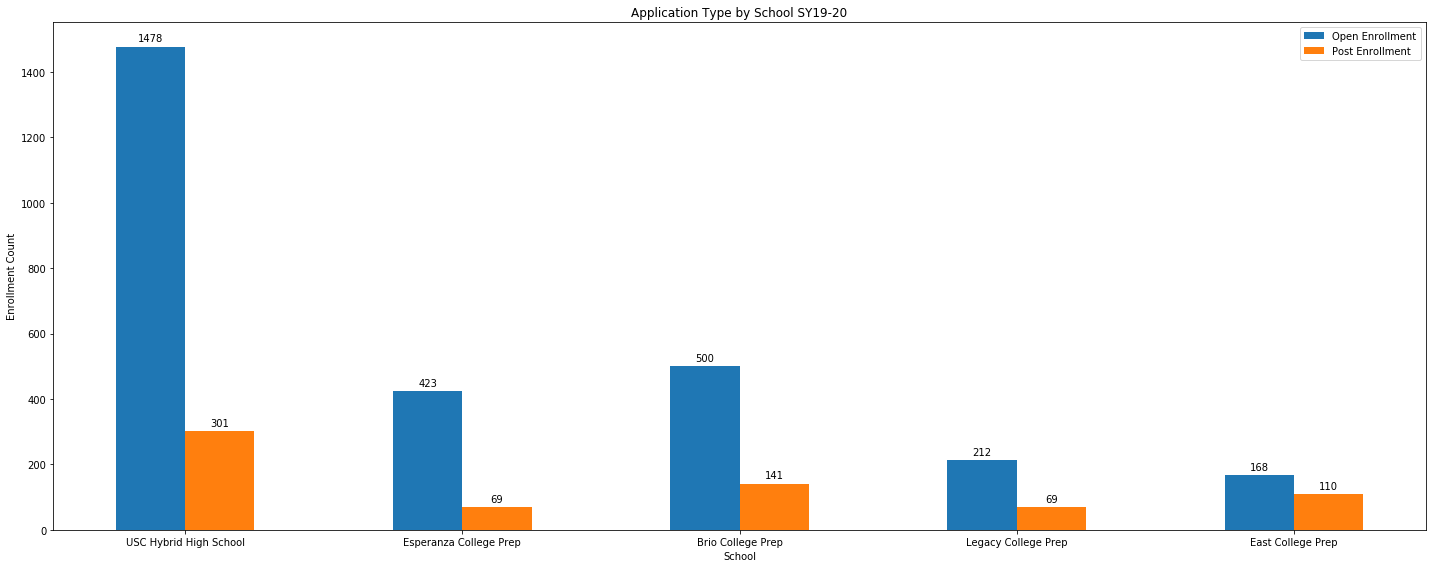

In [52]:
fig,ax = plt.subplots(figsize= (20,8))
rect1 = ax.bar(x-width/2, open_count,width, label = "Open Enrollment")
rect2 = ax.bar(x+width/2, post_count,width, label = "Post Enrollment")

ax.set_ylabel('Enrollment Count')
ax.set_xlabel("School")
ax.set_title('Application Type by School SY19-20')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rect1)
autolabel(rect2)

fig.tight_layout()
fig.savefig("Application_Type")
plt.show()

In [53]:
df_hybrid_only.head()

,Email,Lives With,Date Submitted,Offered Date,Offer Accepted Date,Current Grade,Grade Applied To,School Applied To,Current School,Current School District,...,Student Name,Parent Name,Address,Birthday,Gender,Contact Number,Application Type,Status,Time Stamp,Updated
0,hildaj06@outlook.com,MO|FA,09/04/2018 05:55:07 PDT,,,8.0,9,USC Hybrid High School,,Los Angeles Unified School District,...,Kevin Garcia,Hilda Javier,2741 Van Buren Pl Apt 02 90007 CA Los Angeles,11/20/05,Male,(323) 928-8844,Open Enrollment,Waitlisted-682,2019-02-12 18:46:31,2019-12-03 13:41:48
1,malvagrant@yahoo.com,MO|FA,09/04/2018 06:01:24 PDT,,,8.0,9,USC Hybrid High School,,Los Angeles Unified School District,...,Jazmine Alesha Betson,Malva Palacio- Grant,622 W 77th St Apt 6 90044 CA Los Angeles,07/24/04,Female,(323) 527-6738,Open Enrollment,Waitlisted-307,2019-02-12 18:46:09,2019-12-03 13:41:09
2,3234453696@schoolmint.net,MO,09/04/2018 07:59:07 PDT,,,10.0,11,USC Hybrid High School,,Los Angeles Unified School District,...,Teryn O Johnson,Terrea Moore,4126 2nd Avenue 90008 CA Los Angeles,04/21/03,Male,(323) 445-3696,Open Enrollment,Waitlisted-22,2019-02-12 18:29:20,2019-10-28 15:54:12
3,dalamonte4@gmail.com,FA,09/04/2018 08:53:43 PDT,,,8.0,9,USC Hybrid High School,,Los Angeles Unified School District,...,Uryiah Elizabeth Brown,Davion Brown,735 1/2 W 42nd St 90037 CA Los Angeles,03/18/05,Female,(323) 353-4559,Open Enrollment,Waitlisted-665,2019-02-12 18:46:30,2019-12-03 13:41:46
4,teresanonoal@gmail.com,MO,09/04/2018 09:14:57 PDT,,,9.0,9,USC Hybrid High School,,Los Angeles Unified School District,...,Medeline Garcia,Theresa Nonoal,212 E 30th St 90011 CA Los Angeles,07/15/04,Female,(232) 620-8391,Open Enrollment,Waitlisted-42,2019-02-12 18:45:53,2019-12-03 13:40:40


# Student Status by School

In [54]:
def seperate_status(status):
    status = str(status).split("-")
    return status[0]

## Hybrid

In [520]:
df_hybrid_only["Seperated Status"] = df_hybrid_only["Status"].apply(seperate_status)
status_grouped = df_hybrid_only.groupby("Seperated Status").count()[["School Applied To"]].reset_index()
status_grouped.sort_values(by = "Seperated Status", ascending = False,inplace = True)

C:\Users\nvicente\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


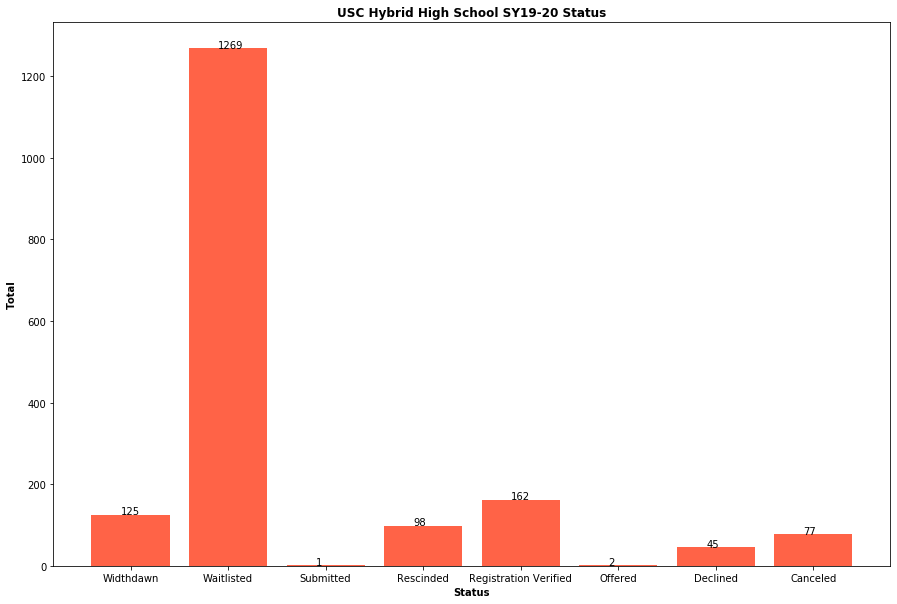

In [521]:
x_label_hybrid = status_grouped["Seperated Status"].tolist()
y_label_hybrid = status_grouped["School Applied To"].tolist()
x_pos = [i for i,_ in enumerate(x_label_hybrid)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_label_hybrid, y_label_hybrid, color="tomato")
plt.xlabel("Status",weight = "bold")
plt.ylabel("Total",weight = "bold")

plt.xticks(x_pos,x_label_hybrid)
plt.title("USC Hybrid High School SY19-20 Status",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_label_hybrid):
    plt.text(x_pos[i]-0.1, v+1, str(v))

plt.show()
fig.savefig("test.png")

## East

In [522]:
df_east_only["Seperated Status"] = df_east_only["Status"].apply(seperate_status)
status_grouped = df_east_only.groupby("Seperated Status").count()[["School Applied To"]].reset_index()
status_grouped.sort_values(by = "Seperated Status", ascending = False,inplace = True)

C:\Users\nvicente\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


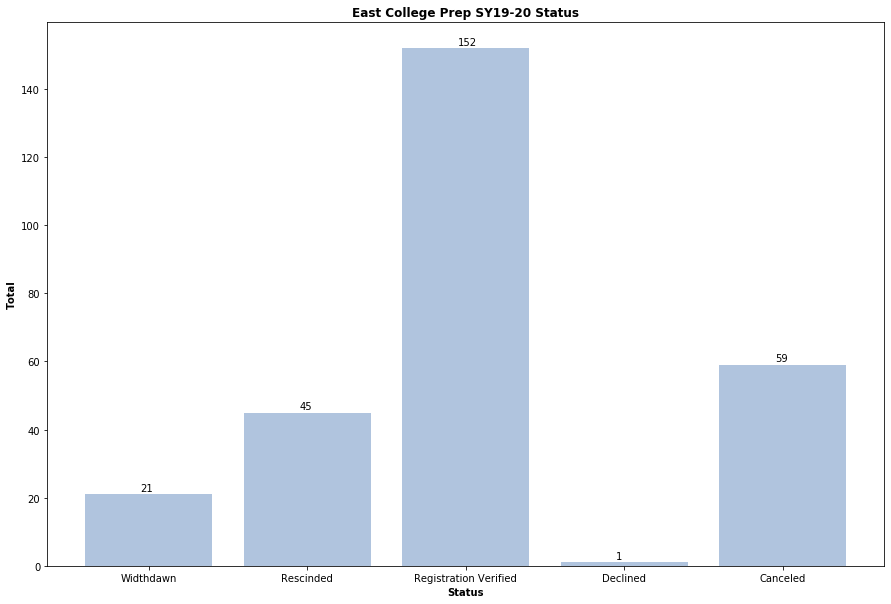

In [523]:
x_label_east = status_grouped["Seperated Status"].tolist()
y_label_east = status_grouped["School Applied To"].tolist()
x_pos = [i for i,_ in enumerate(x_label_east)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_label_east, y_label_east, color="lightsteelblue")
plt.xlabel("Status",weight = "bold")
plt.ylabel("Total",weight = "bold")

plt.xticks(x_pos,x_label_east)
plt.title("East College Prep SY19-20 Status",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_label_east):
    plt.text(x_pos[i]-0.05, v+1, str(v))

plt.show()

## Esperanza

In [524]:
df_esperanza_only["Seperated Status"] = df_esperanza_only["Status"].apply(seperate_status)
status_grouped = df_esperanza_only.groupby("Seperated Status").count()[["School Applied To"]].reset_index()
status_grouped.sort_values(by = "Seperated Status", ascending = False,inplace = True)

C:\Users\nvicente\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


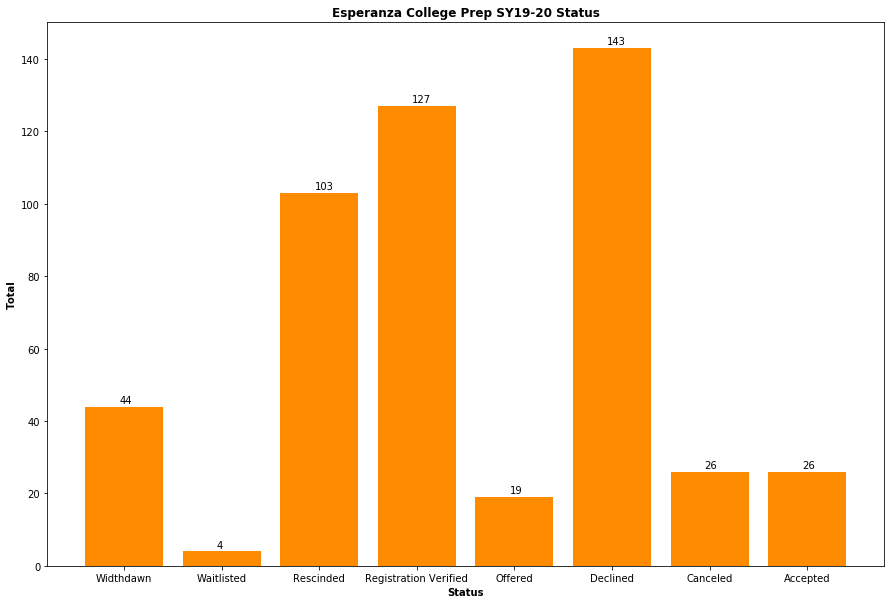

In [525]:
x_label_esperanza = status_grouped["Seperated Status"].tolist()
y_label_esperanza = status_grouped["School Applied To"].tolist()
x_pos = [i for i,_ in enumerate(x_label_esperanza)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_label_esperanza, y_label_esperanza, color="darkorange")
plt.xlabel("Status",weight = "bold")
plt.ylabel("Total",weight = "bold")

plt.xticks(x_pos,x_label_esperanza)
plt.title("Esperanza College Prep SY19-20 Status",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_label_esperanza):
    plt.text(x_pos[i]-0.05, v+1, str(v))

plt.show()

## Brio

In [526]:
df_brio_only["Seperated Status"] = df_brio_only["Status"].apply(seperate_status)
status_grouped = df_brio_only.groupby("Seperated Status").count()[["School Applied To"]].reset_index()
status_grouped.sort_values(by = "Seperated Status", ascending = False,inplace = True)

C:\Users\nvicente\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


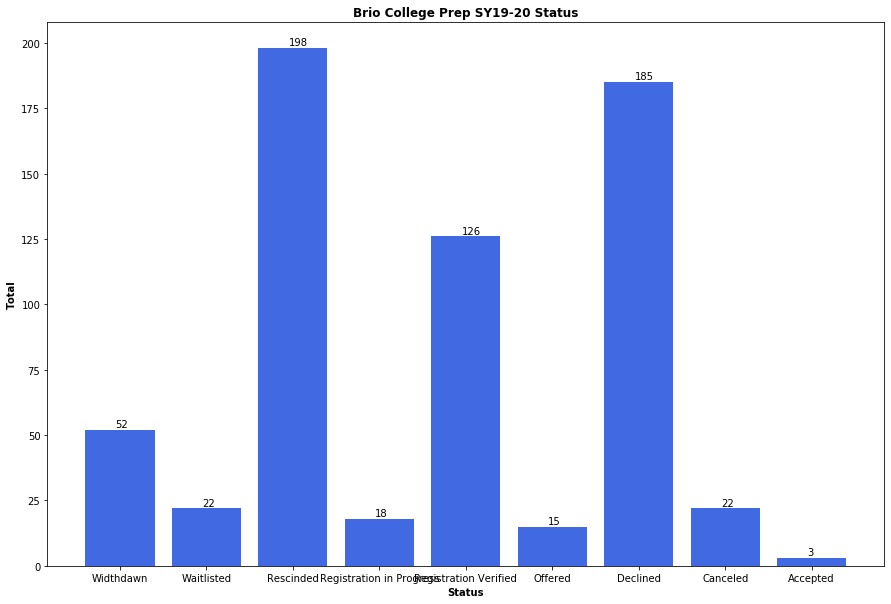

In [527]:
x_label_brio = status_grouped["Seperated Status"].tolist()
y_label_brio = status_grouped["School Applied To"].tolist()
x_pos = [i for i,_ in enumerate(x_label_brio)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_label_brio, y_label_brio, color="royalblue")
plt.xlabel("Status",weight = "bold")
plt.ylabel("Total",weight = "bold")

plt.xticks(x_pos,x_label_brio)
plt.title("Brio College Prep SY19-20 Status",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_label_brio):
    plt.text(x_pos[i]-0.05, v+1, str(v))

plt.show()

## Legacy

In [528]:
df_legacy_only["Seperated Status"] = df_legacy_only["Status"].apply(seperate_status)
status_grouped = df_legacy_only.groupby("Seperated Status").count()[["School Applied To"]].reset_index()
status_grouped.sort_values(by = "Seperated Status", ascending = False,inplace = True)

C:\Users\nvicente\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


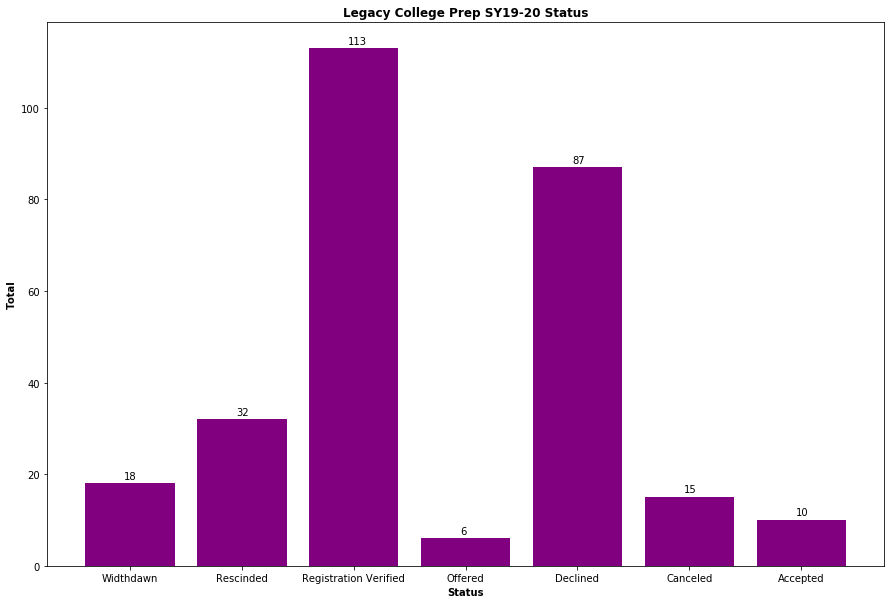

In [529]:
x_label_legacy = status_grouped["Seperated Status"].tolist()
y_label_legacy = status_grouped["School Applied To"].tolist()
x_pos = [i for i,_ in enumerate(x_label_legacy)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_label_legacy, y_label_legacy, color="purple")
plt.xlabel("Status",weight = "bold")
plt.ylabel("Total",weight = "bold")

plt.xticks(x_pos,x_label_legacy)
plt.title("Legacy College Prep SY19-20 Status",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_label_legacy):
    plt.text(x_pos[i]-0.05, v+1, str(v))

plt.show()

In [530]:
def match_list(masterlist: list, unfixed_list: list):
    if masterlist == unfixed_list:
        return unfixed_list
    else:
        if len(masterlist) != len(unfixed_list):
            x = len(masterlist) - len(unfixed_list)
            for i in range(x):
                unfixed_list.append("")

        for i in range(len(masterlist)):
            if masterlist[i] != unfixed_list[i]:
                unfixed_list.insert(i,masterlist[i])
        unfixed_list = [x for x in unfixed_list if x]

    return unfixed_list

In [531]:
df["New Status"] = df["Status"].apply(seperate_status)

In [532]:
status_list = df["New Status"].drop_duplicates().tolist()

In [533]:
status_list

['Waitlisted',
 'Canceled',
 'Declined',
 'Registration Verified',
 'Rescinded',
 'Widthdawn',
 'Accepted',
 'Registration in Progress',
 'Offered',
 'Submitted']

In [534]:
x_label_hybrid = match_list(status_list, x_label_hybrid)

In [535]:
x_label_hybrid

['Waitlisted',
 'Canceled',
 'Declined',
 'Registration Verified',
 'Rescinded',
 'Widthdawn',
 'Accepted',
 'Registration in Progress',
 'Offered',
 'Submitted',
 'Waitlisted',
 'Submitted',
 'Rescinded',
 'Registration Verified',
 'Offered',
 'Declined',
 'Canceled']

In [536]:
x_label_east = match_list(status_list, x_label_east)

In [537]:
x_label_east

['Waitlisted',
 'Canceled',
 'Declined',
 'Registration Verified',
 'Rescinded',
 'Widthdawn',
 'Accepted',
 'Registration in Progress',
 'Offered',
 'Submitted',
 'Rescinded',
 'Registration Verified',
 'Declined',
 'Canceled']

In [492]:
x_label_east = match_list(x_label_hybrid, x_label_east)

In [493]:
x_label_esperanza = match_list(x_label_hybrid, x_label_esperanza)

In [494]:
x_label_brio = match_list(x_label_hybrid, x_label_brio)

In [495]:
x_label_legacy = match_list(x_label_hybrid, x_label_legacy)

In [503]:
x_label_brio

['Widthdawn',
 'Waitlisted',
 'Rescinded',
 'Registration in Progress',
 'Registration Verified',
 'Offered',
 'Declined',
 'Canceled',
 'Accepted']

In [505]:
x_label_hybrid

['Widthdawn',
 'Waitlisted',
 'Submitted',
 'Rescinded',
 'Registration Verified',
 'Offered',
 'Declined',
 'Canceled',
 'Accepted']

# Grade Levels by School

## Hybrid

In [65]:
df_hybrid_group = df_hybrid_only.groupby("Grade Applied To").count()[["School Applied To"]].reset_index()

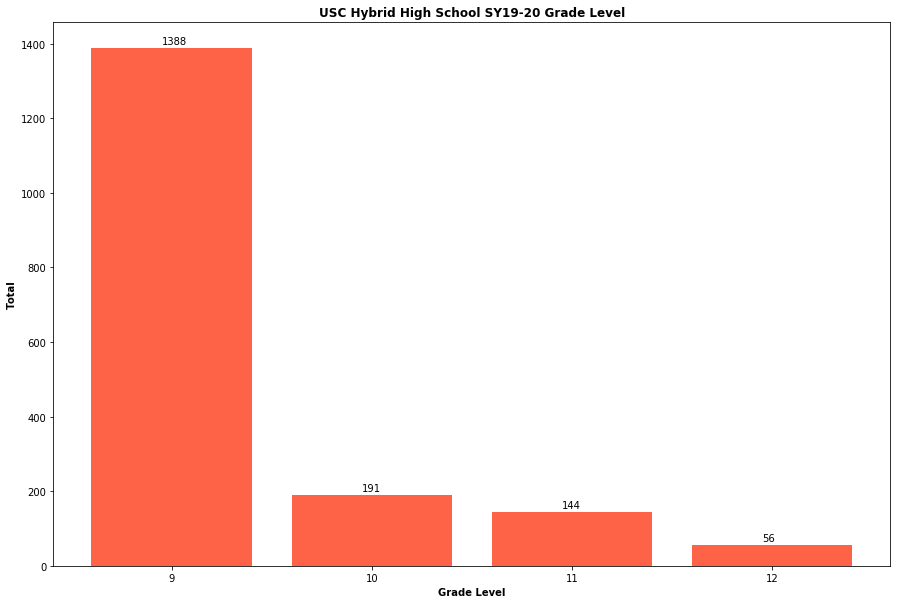

In [66]:
x_hybrid = df_hybrid_group["Grade Applied To"].tolist()
y_hybrid = df_hybrid_group["School Applied To"].tolist()

x_hybrid = [str(j) for j in x_hybrid]

x_pos = [str(i) for i,_ in enumerate(x_hybrid)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_hybrid, y_hybrid, color="tomato")
plt.xlabel("Grade Level",weight = "bold")
plt.ylabel("Total",weight = "bold")

#plt.xticks(x_pos,x_hybrid)
plt.title("USC Hybrid High School SY19-20 Grade Level",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_hybrid):
    plt.text(int(x_pos[i])-0.05, v+10, str(v))

plt.show()

## East

In [67]:
df_east_group = df_east_only.groupby("Grade Applied To").count()[["School Applied To"]].reset_index()

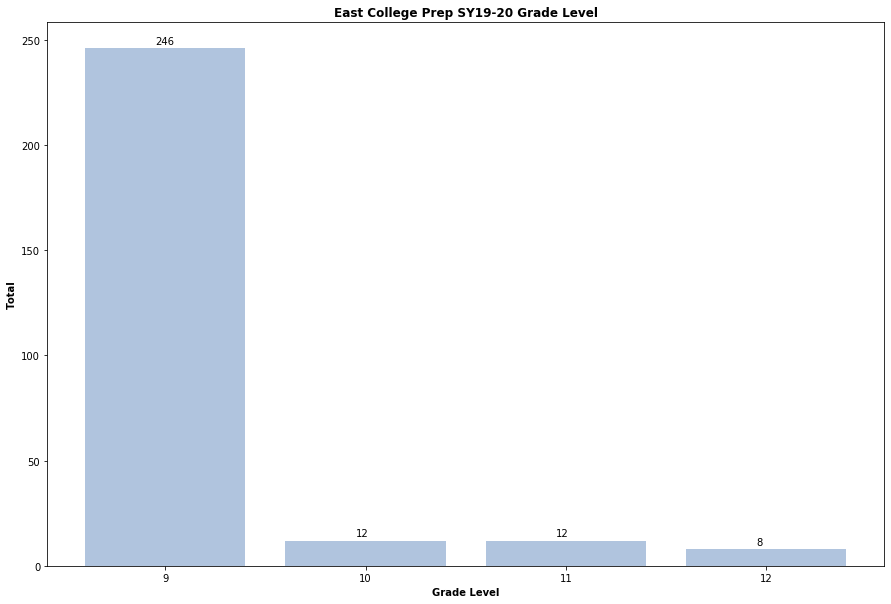

In [68]:
x_east = df_east_group["Grade Applied To"].tolist()
y_east = df_east_group["School Applied To"].tolist()

x_east = [str(j) for j in x_east]

x_pos = [str(i) for i,_ in enumerate(x_east)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_east, y_east, color="lightsteelblue")
plt.xlabel("Grade Level",weight = "bold")
plt.ylabel("Total",weight = "bold")

#plt.xticks(x_pos,x_hybrid)
plt.title("East College Prep SY19-20 Grade Level",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_east):
    plt.text(int(x_pos[i])-0.05, v+2, str(v))

plt.show()

## Esperanza

In [69]:
df_esperanza_group = df_esperanza_only.groupby("Grade Applied To").count()[["School Applied To"]].reset_index()

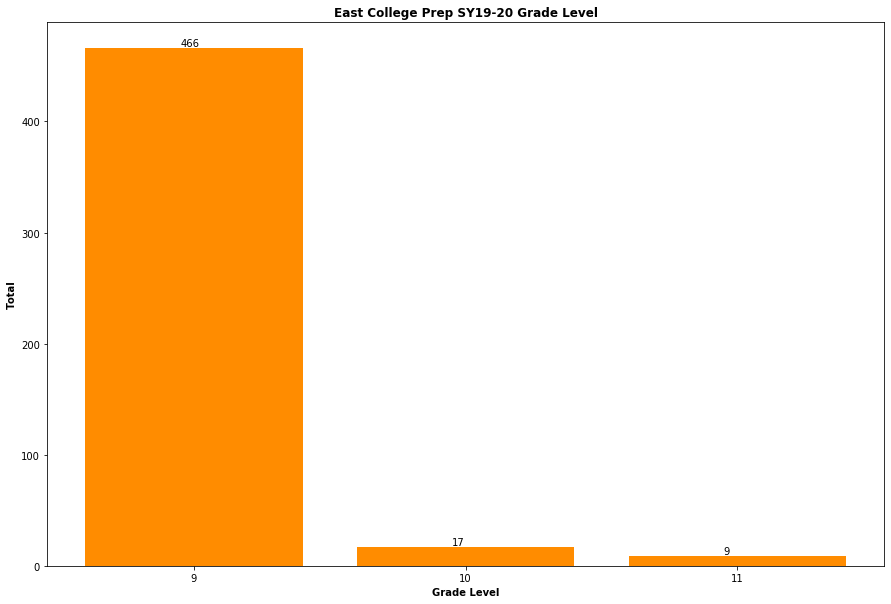

In [70]:
x_esperanza = df_esperanza_group["Grade Applied To"].tolist()
y_esperanza = df_esperanza_group["School Applied To"].tolist()

x_esperanza = [str(j) for j in x_esperanza]

x_pos = [str(i) for i,_ in enumerate(x_esperanza)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_esperanza, y_esperanza, color="darkorange")
plt.xlabel("Grade Level",weight = "bold")
plt.ylabel("Total",weight = "bold")

#plt.xticks(x_pos,x_hybrid)
plt.title("East College Prep SY19-20 Grade Level",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_esperanza):
    plt.text(int(x_pos[i])-0.05, v+2, str(v))

plt.show()

## Brio

In [71]:
df_brio_group = df_brio_only.groupby("Grade Applied To").count()[["School Applied To"]].reset_index()

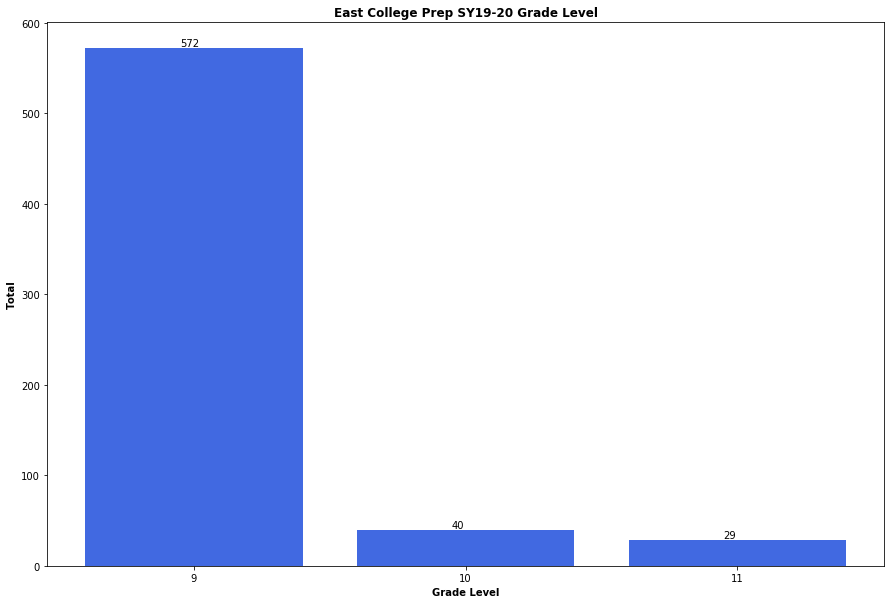

In [72]:
x_brio = df_brio_group["Grade Applied To"].tolist()
y_brio = df_brio_group["School Applied To"].tolist()

x_brio = [str(j) for j in x_brio]

x_pos = [str(i) for i,_ in enumerate(x_brio)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_brio, y_brio, color="royalblue")
plt.xlabel("Grade Level",weight = "bold")
plt.ylabel("Total",weight = "bold")

#plt.xticks(x_pos,x_hybrid)
plt.title("East College Prep SY19-20 Grade Level",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_brio):
    plt.text(int(x_pos[i])-0.05, v+2, str(v))

plt.show()

## Legacy

In [73]:
df_legacy_group = df_legacy_only.groupby("Grade Applied To").count()[["School Applied To"]].reset_index()

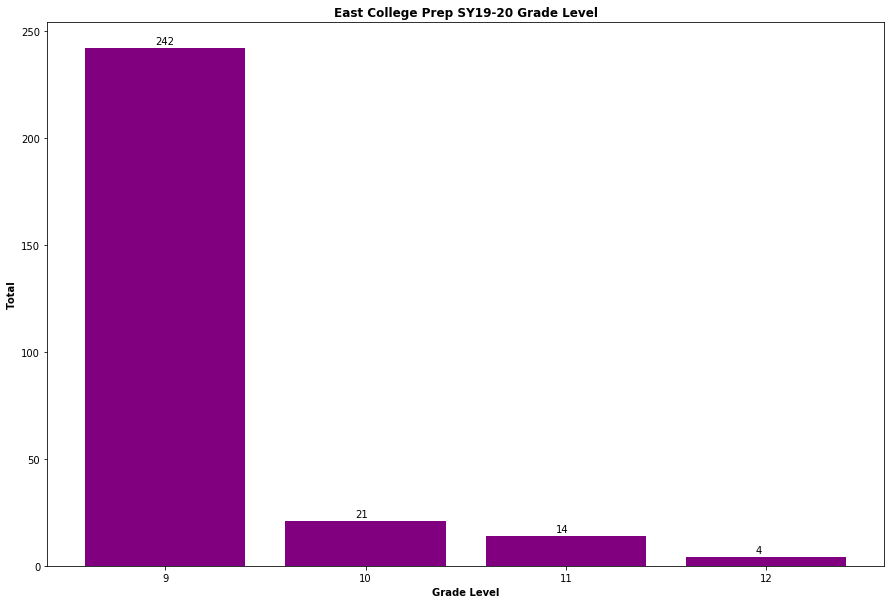

In [74]:
x_legacy = df_legacy_group["Grade Applied To"].tolist()
y_legacy = df_legacy_group["School Applied To"].tolist()

x_legacy = [str(j) for j in x_legacy]

x_pos = [str(i) for i,_ in enumerate(x_legacy)]

fig = plt.figure(figsize = (15,10))

plt.bar(x_legacy, y_legacy, color="purple")
plt.xlabel("Grade Level",weight = "bold")
plt.ylabel("Total",weight = "bold")

#plt.xticks(x_pos,x_hybrid)
plt.title("East College Prep SY19-20 Grade Level",weight = "bold")

# Add labels on top of bar chart
for i, v in enumerate(y_legacy):
    plt.text(int(x_pos[i])-0.05, v+2, str(v))

plt.show()

## All Schools

In [75]:
y_esperanza.append(0)
y_brio.append(0)
# y_esperanza
# y_brio

In [76]:
labels = df["Grade Applied To"].drop_duplicates().to_list()
hybrid = [y_hybrid[0], y_hybrid[1], y_hybrid[2], y_hybrid[3]]
esperanza = [y_esperanza[0], y_esperanza[1], y_esperanza[2], y_esperanza[3]]
east =  [y_east[0], y_east[1], y_east[2], y_east[3]]
legacy  = [y_legacy[0], y_legacy[1], y_legacy[2], y_legacy[3]]
brio  = [y_brio[0], y_brio[1], y_brio[2], y_brio[3]]
x = np.arange(len(labels))
width = 0.15

In [77]:
labels.sort()

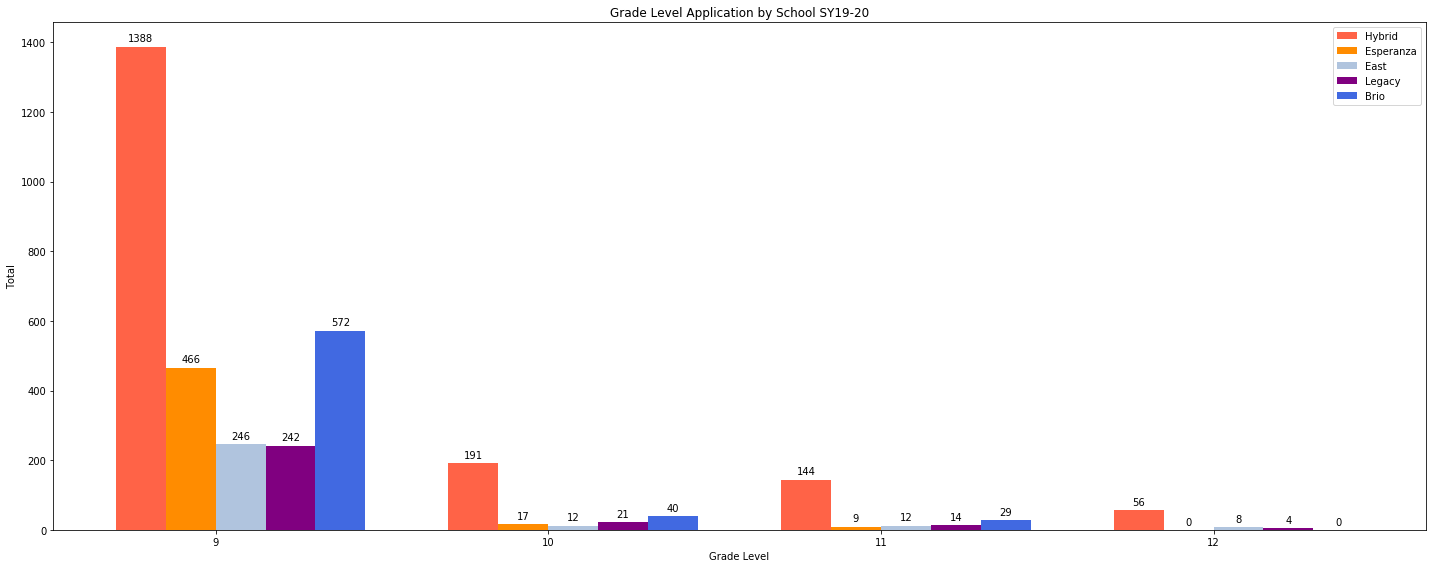

In [78]:
fig,ax = plt.subplots(figsize= (20,8))
rect1 = ax.bar(x-width*1.5, hybrid,width,color="tomato", label = "Hybrid")
rect2 = ax.bar(x-width/2, esperanza,width,color="darkorange",label = "Esperanza")
rect3 = ax.bar(x+width/2, east,width, color = "lightsteelblue", label = "East")
rect4 = ax.bar(x+width*1.5, legacy,width, color="purple", label = "Legacy")
rect5 = ax.bar(x+width*2.5, brio,width,color = "royalblue", label = "Brio")

ax.set_ylabel('Total')
ax.set_xlabel("Grade Level")
ax.set_title('Grade Level Application by School SY19-20')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
autolabel(rect5)

fig.tight_layout()
#fig.savefig("Application_Type")
plt.show()

# New Graphs

In [83]:
df_hybrid_only.head()

,Email,Lives With,Date Submitted,Offered Date,Offer Accepted Date,Current Grade,Grade Applied To,School Applied To,Current School,Current School District,...,Parent Name,Address,Birthday,Gender,Contact Number,Application Type,Status,Time Stamp,Updated,Seperated Status
0,hildaj06@outlook.com,MO|FA,09/04/2018 05:55:07 PDT,,,8.0,9,USC Hybrid High School,,Los Angeles Unified School District,...,Hilda Javier,2741 Van Buren Pl Apt 02 90007 CA Los Angeles,11/20/05,Male,(323) 928-8844,Open Enrollment,Waitlisted-682,2019-02-12 18:46:31,2019-12-03 13:41:48,Waitlisted
1,malvagrant@yahoo.com,MO|FA,09/04/2018 06:01:24 PDT,,,8.0,9,USC Hybrid High School,,Los Angeles Unified School District,...,Malva Palacio- Grant,622 W 77th St Apt 6 90044 CA Los Angeles,07/24/04,Female,(323) 527-6738,Open Enrollment,Waitlisted-307,2019-02-12 18:46:09,2019-12-03 13:41:09,Waitlisted
2,3234453696@schoolmint.net,MO,09/04/2018 07:59:07 PDT,,,10.0,11,USC Hybrid High School,,Los Angeles Unified School District,...,Terrea Moore,4126 2nd Avenue 90008 CA Los Angeles,04/21/03,Male,(323) 445-3696,Open Enrollment,Waitlisted-22,2019-02-12 18:29:20,2019-10-28 15:54:12,Waitlisted
3,dalamonte4@gmail.com,FA,09/04/2018 08:53:43 PDT,,,8.0,9,USC Hybrid High School,,Los Angeles Unified School District,...,Davion Brown,735 1/2 W 42nd St 90037 CA Los Angeles,03/18/05,Female,(323) 353-4559,Open Enrollment,Waitlisted-665,2019-02-12 18:46:30,2019-12-03 13:41:46,Waitlisted
4,teresanonoal@gmail.com,MO,09/04/2018 09:14:57 PDT,,,9.0,9,USC Hybrid High School,,Los Angeles Unified School District,...,Theresa Nonoal,212 E 30th St 90011 CA Los Angeles,07/15/04,Female,(232) 620-8391,Open Enrollment,Waitlisted-42,2019-02-12 18:45:53,2019-12-03 13:40:40,Waitlisted


In [90]:
hybrid_grouped = df_hybrid_only.groupby("Seperated Status").count()[["School Applied To"]].reset_index().sort_values(by = "School Applied To",ascending = False)

In [101]:
x_hybrid = hybrid_grouped["Seperated Status"]
y_hybrid = hybrid_grouped["School Applied To"]

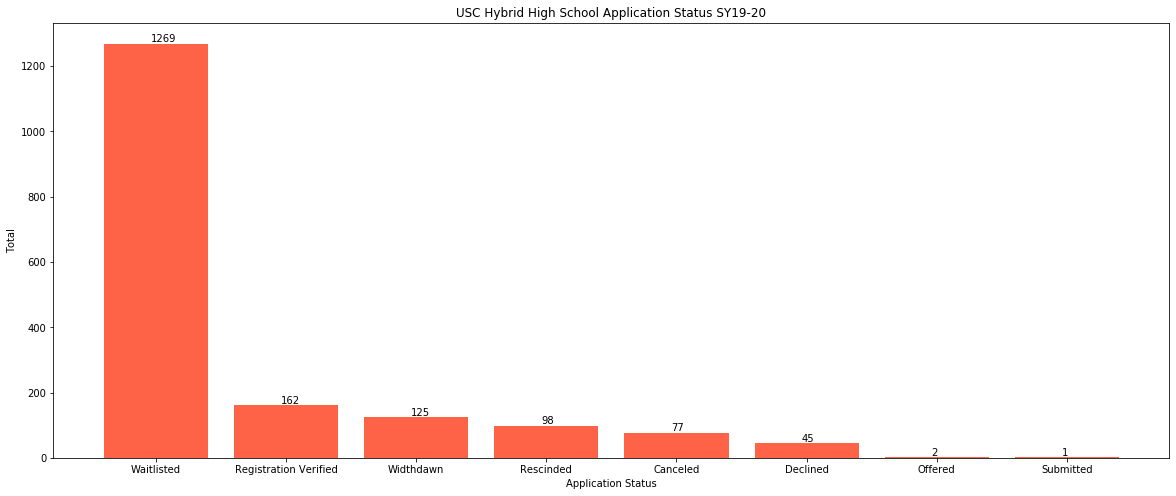

In [119]:
x_hybrid = [str(j) for j in x_hybrid]

x_pos = [i for i,_ in enumerate(x_hybrid)]

plt.figure(figsize = (20,8))
plt.bar(x_hybrid,y_hybrid,color = "tomato")
plt.xlabel("Application Status")
plt.ylabel("Total")
plt.title("USC Hybrid High School Application Status SY19-20")

for i,v in enumerate(y_hybrid):
    plt.text(x_pos[i]-0.04,v+5,str(v))

plt.show()